# Feature Engineering

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv("..\\data\\titanic\\train.csv")
test = pd.read_csv("..\\data\\titanic\\test.csv")
all_data = pd.concat([train,test])

In [7]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
all_data[['Fare']]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
413,8.0500
414,108.9000
415,7.2500
416,8.0500


In [10]:
survived = all_data [ all_data['Survived'] ==1 ]["Sex"].value_counts()
dead = all_data [ all_data['Survived'] ==0 ]["Sex"].value_counts()

In [11]:
survived

female    233
male      109
Name: Sex, dtype: int64

In [12]:
new_df = pd.DataFrame([survived,dead])

In [13]:
new_df

,female,male
Sex,233,109
Sex,81,468


<AxesSubplot:>

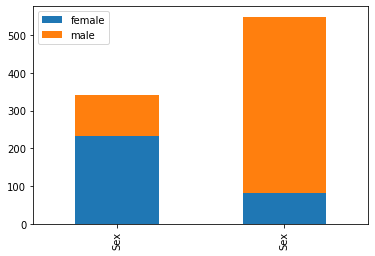

In [14]:
new_df.plot(kind="bar", stacked=True)

In [15]:
def bar(all_data, column):
    survived = all_data [ all_data['Survived'] ==1 ][column].value_counts()
    dead = all_data [ all_data['Survived'] ==0 ][column].value_counts()
    new_df = pd.DataFrame([survived,dead])
    new_df.index = ['3acho', 'mato']
    new_df.plot(kind="bar", stacked=True, figsize=(15,10))

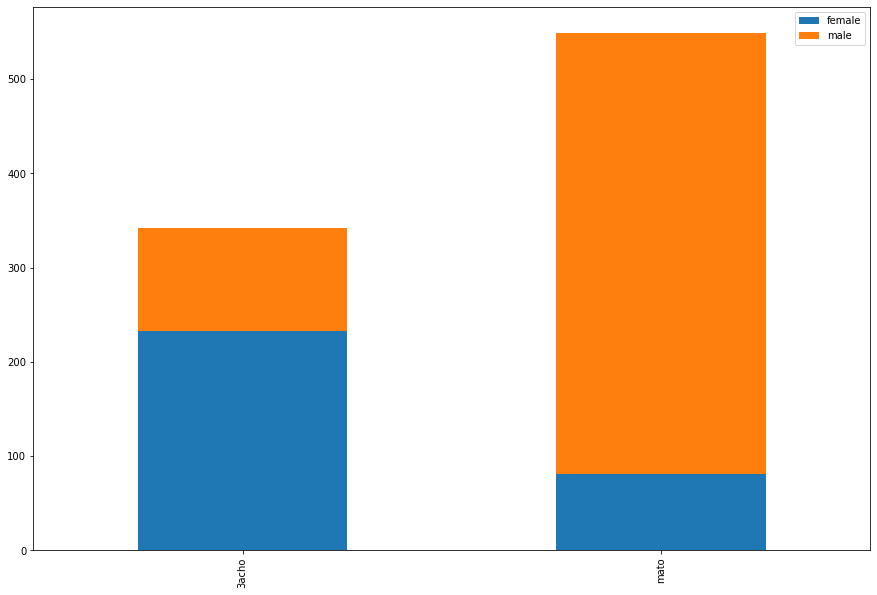

In [16]:
bar(all_data,"Sex")

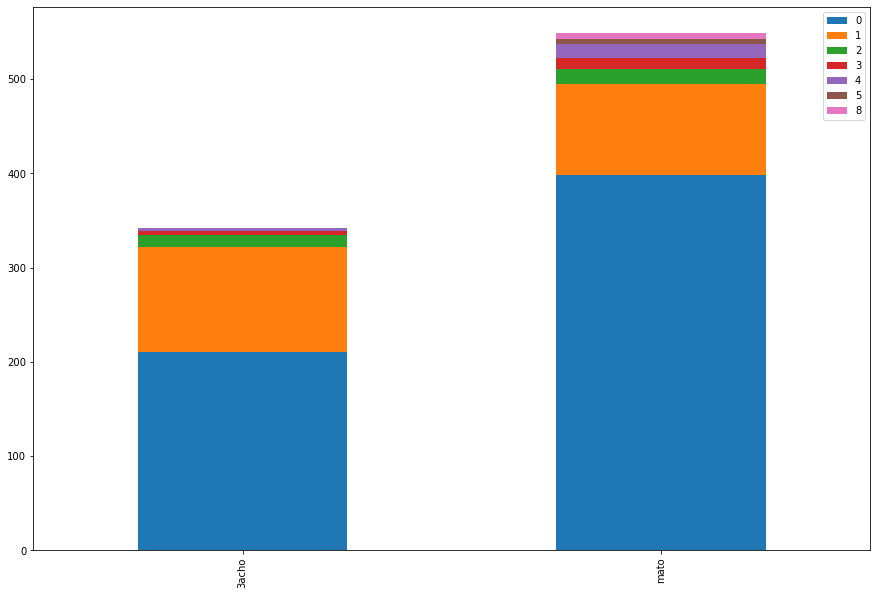

In [17]:
bar(all_data,"SibSp")

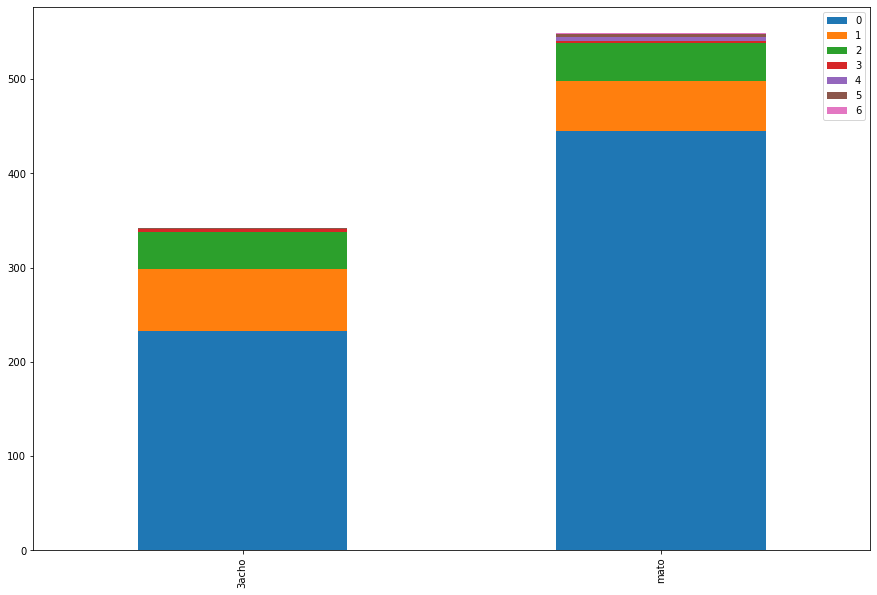

In [18]:
bar(all_data,"Parch")

In [19]:
data = all_data

## Cabin feature

In [20]:
data['Cabin_type'] = data["Cabin"].astype(str).str[0]

In [21]:
data['Cabin_type'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_type, dtype: int64

In [22]:
data['Cabin_type'] = data['Cabin_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8 })

In [23]:
data['Cabin_type']

0      NaN
1      3.0
2      NaN
3      3.0
4      NaN
      ... 
413    NaN
414    3.0
415    NaN
416    NaN
417    NaN
Name: Cabin_type, Length: 1309, dtype: float64

In [24]:
data['Cabin_type'].fillna(0, inplace= True)

## Name feature

In [25]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [26]:
data = [data]
for df in data:
    df['status'] = df['Name'].str.extract('([A-Za-z]+)\.')

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,status
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3.0,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.0,Mr


In [28]:
df.status.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [29]:
df.status = df.status.replace ( ['Master', 'Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess','Jonkheer'], 'important')

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,status
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3.0,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.0,Mr


In [31]:
df.status = df.status.replace ( ['Mlle', 'Ms', 'Miss', 'Mme' ], 'Miss')
df.status = df.status.replace ( ['Mr', 'Mrs' ], 'Mrs')

In [32]:
df.status.unique()

array(['Mrs', 'Miss', 'important', 'Dona'], dtype=object)

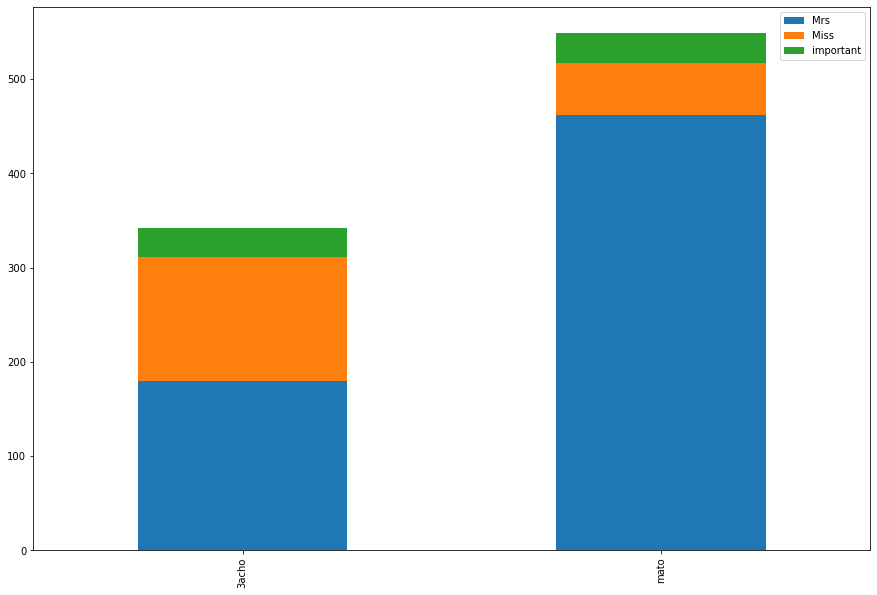

In [33]:
bar(df,'status')

In [34]:
df['status'] = df['status'].map({'Mrs':1,'Miss':2,'important':3})

In [35]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,status
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,1.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,3.0,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,1.0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0.0,1.0


## Sex feature

In [36]:
df['Sex'] = df['Sex'].map({'male':0,'female':1 })

In [37]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,status
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,1.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,3.0,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,1.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0.0,1.0


## Family feature

In [38]:
df['family_size'] =  df['SibSp'] + df['Parch'] + 1

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,status,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1.0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0,1.0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,1.0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,3.0,NaN,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,1.0,1
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0.0,1.0,1


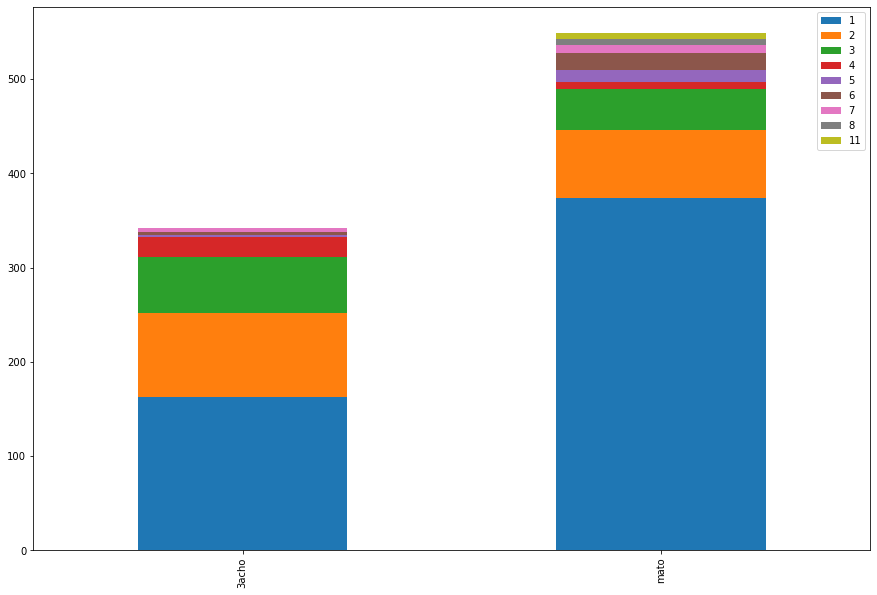

In [40]:
bar(df, 'family_size')

In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,status,family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3.0,1.0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3.0,1.0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S,0.0,1.0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,3.0,NaN,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0,1.0,1
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S,0.0,1.0,1


In [42]:
df.drop([ 'PassengerId','Name', 'SibSp', 'SibSp', 'Ticket', 'Cabin','Embarked', 'Parch'], axis =1 , inplace=True)

In [43]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin_type,status,family_size
0,0.0,3,0,22.0,7.2500,0.0,1.0,2
1,1.0,1,1,38.0,71.2833,3.0,1.0,2
2,1.0,3,1,26.0,7.9250,0.0,2.0,1
3,1.0,1,1,35.0,53.1000,3.0,1.0,2
4,0.0,3,0,35.0,8.0500,0.0,1.0,1
...,...,...,...,...,...,...,...,...
413,NaN,3,0,NaN,8.0500,0.0,1.0,1
414,NaN,1,1,39.0,108.9000,3.0,NaN,1
415,NaN,3,0,38.5,7.2500,0.0,1.0,1
416,NaN,3,0,NaN,8.0500,0.0,1.0,1


# Intro to machine learning

## Linear regression

[1, 2, 3, 3.5, 5]
[1.5, 1.7, 2, 3, 3.5]


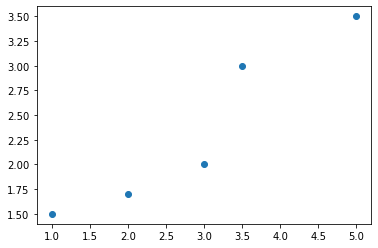

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = [1, 2, 3, 3.5, 5]
y = [1.5, 1.7, 2, 3, 3.5]
print(X)
print(y)
plt.scatter(X,y)


In [45]:
print(np.array(X))
print(np.array(y))
X_array = np.array(X).reshape(-1, 1)
y_array = np.array(y).reshape(-1, 1)
print(X_array)
print(y_array)

[1.  2.  3.  3.5 5. ]
[1.5 1.7 2.  3.  3.5]
[[1. ]
 [2. ]
 [3. ]
 [3.5]
 [5. ]]
[[1.5]
 [1.7]
 [2. ]
 [3. ]
 [3.5]]


In [46]:
LR_model = LinearRegression()

LR_model.fit(X_array,y_array)



LinearRegression()

In [47]:
new_data = np.array([1.5, 2.5, 4]).reshape(-1,1)
predictions = LR_model.predict(new_data)


In [48]:
all_X =  np.concatenate((X_array, new_data))
print(all_X)
all_Y = np.concatenate((y_array, predictions))
print(all_Y)

[[1. ]
 [2. ]
 [3. ]
 [3.5]
 [5. ]
 [1.5]
 [2.5]
 [4. ]]
[[1.5       ]
 [1.7       ]
 [2.        ]
 [3.        ]
 [3.5       ]
 [1.58369565]
 [2.12391304]
 [2.93423913]]


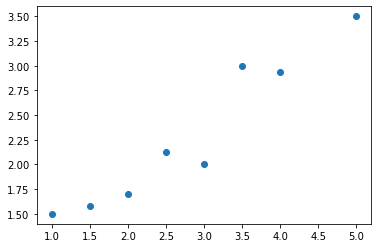

In [49]:
plt.scatter(all_X,all_Y)

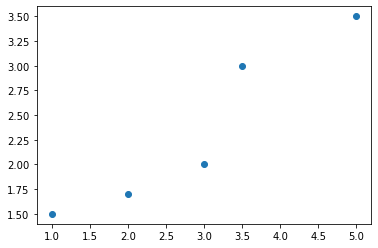

In [50]:
plt.scatter(X,y)

## Titanic Example

In [51]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin_type,status,family_size
0,0.0,3,0,22.0,7.2500,0.0,1.0,2
1,1.0,1,1,38.0,71.2833,3.0,1.0,2
2,1.0,3,1,26.0,7.9250,0.0,2.0,1
3,1.0,1,1,35.0,53.1000,3.0,1.0,2
4,0.0,3,0,35.0,8.0500,0.0,1.0,1
...,...,...,...,...,...,...,...,...
413,NaN,3,0,NaN,8.0500,0.0,1.0,1
414,NaN,1,1,39.0,108.9000,3.0,NaN,1
415,NaN,3,0,38.5,7.2500,0.0,1.0,1
416,NaN,3,0,NaN,8.0500,0.0,1.0,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1046 non-null   float64
 4   Fare         1308 non-null   float64
 5   Cabin_type   1309 non-null   float64
 6   status       1308 non-null   float64
 7   family_size  1309 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 92.0 KB


In [53]:
mean_age = df.Age.mean()

In [54]:
df.Age.fillna(mean_age, inplace=True)

In [55]:
train = df.dropna()

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin_type   891 non-null    float64
 6   status       891 non-null    float64
 7   family_size  891 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 62.6 KB


In [57]:
train

,Survived,Pclass,Sex,Age,Fare,Cabin_type,status,family_size
0,0.0,3,0,22.000000,7.2500,0.0,1.0,2
1,1.0,1,1,38.000000,71.2833,3.0,1.0,2
2,1.0,3,1,26.000000,7.9250,0.0,2.0,1
3,1.0,1,1,35.000000,53.1000,3.0,1.0,2
4,0.0,3,0,35.000000,8.0500,0.0,1.0,1
...,...,...,...,...,...,...,...,...
886,0.0,2,0,27.000000,13.0000,0.0,3.0,1
887,1.0,1,1,19.000000,30.0000,2.0,2.0,1
888,0.0,3,1,29.881138,23.4500,0.0,2.0,4
889,1.0,1,0,26.000000,30.0000,3.0,1.0,1


In [58]:
test = df[df.Survived.isna()]

In [59]:
col = ["Age", "family_size","Pclass","Sex","Cabin_type","status","Fare"]
train_X = train[col]
train_X

,Age,family_size,Pclass,Sex,Cabin_type,status,Fare
0,22.000000,2,3,0,0.0,1.0,7.2500
1,38.000000,2,1,1,3.0,1.0,71.2833
2,26.000000,1,3,1,0.0,2.0,7.9250
3,35.000000,2,1,1,3.0,1.0,53.1000
4,35.000000,1,3,0,0.0,1.0,8.0500
...,...,...,...,...,...,...,...
886,27.000000,1,2,0,0.0,3.0,13.0000
887,19.000000,1,1,1,2.0,2.0,30.0000
888,29.881138,4,3,1,0.0,2.0,23.4500
889,26.000000,1,1,0,3.0,1.0,30.0000


In [60]:
train_y = train["Survived"]
train_y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

# Logstic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

LR_classification = LogisticRegression()

In [62]:
LR_classification.fit(train_X,train_y)

LogisticRegression()

In [63]:
Predictions = LR_classification.predict(train_X)

In [64]:
type(Predictions)

numpy.ndarray

In [65]:
type(np.array(train_y))

numpy.ndarray

In [66]:
print("the accuracy of the model is: {:.2f}%".format(LR_classification.score(train_X,train_y)*100))

the accuracy of the model is: 80.81%


# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

In [68]:
DT.fit(train_X,train_y)

DecisionTreeClassifier()

In [69]:
Predictions = DT.predict(train_X)

In [70]:
Predictions

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

In [71]:
print("the accuracy of the model is: {:.2f}%".format(DT.score(train_X,train_y)*100))

the accuracy of the model is: 98.77%


# Abstraction

In [72]:
def model_training(models):
    for element in models:
        model = models[element]
        model.fit(train_X,train_y)
        print("the accuracy of "+element+" is: {:.2f}%".format(model.score(train_X,train_y)*100))

In [73]:
our_models = {"Logistic Regression":LogisticRegression(), "Decision Tree":DecisionTreeClassifier()}

In [74]:
model_training(our_models)

the accuracy of Logistic Regression is: 80.81%
the accuracy of Decision Tree is: 98.77%


# Mooooore MODELS!!!

In [75]:
!pip install xgboost

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")

In [77]:
our_models = {"Logistic Regression":LogisticRegression(), "Decision Tree":DecisionTreeClassifier(), "Nearest Neighbors": KNeighborsClassifier(), "Random Forest":RandomForestClassifier(), "XGBClassifier": xgb.XGBClassifier(), "SVM":svm.SVC()}

In [78]:
model_training(our_models)

the accuracy of Logistic Regression is: 80.81%
the accuracy of Decision Tree is: 98.77%
the accuracy of Nearest Neighbors is: 80.81%
the accuracy of Random Forest is: 98.77%
[00:07:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
the accuracy of XGBClassifier is: 96.52%
the accuracy of SVM is: 68.35%


# Evaluation example

In [114]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=10, n_redundant=0,
                           random_state=0)


In [115]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.060184,3.052309,0.622254,0.526612,-0.594605,1.373629,0.863986,1.727701,-0.718169,-0.170642
1,-0.119421,-0.976390,1.814020,-0.383116,0.213219,-0.531722,0.892279,-1.189369,0.722694,1.199453
2,-0.048140,1.817689,-0.406420,1.009011,-0.062140,-0.560070,0.554373,-0.298797,-0.142031,-0.051095
3,-0.024994,0.299612,-0.454151,-0.282402,-1.876064,-0.349118,-1.907201,-0.325004,1.326554,-0.279992
4,-1.742447,1.787035,0.906670,-0.797301,-0.168626,0.693066,0.948043,-0.458223,0.370597,1.206654
...,...,...,...,...,...,...,...,...,...,...
9995,0.897815,-1.571899,-0.930920,2.309858,-0.778002,-1.294807,-0.076300,-0.257171,-0.999210,0.140572
9996,-1.011577,-2.015276,-0.300449,-1.057704,-0.995136,-0.362986,-0.823484,-0.949991,-1.168222,1.329969
9997,-0.825579,0.779507,0.560667,-0.465573,1.254928,0.215275,-0.512799,-0.274877,-1.699962,0.398041
9998,-0.291129,2.028281,1.350106,-0.627034,-1.096947,-0.224120,1.031813,0.920488,-0.469725,-2.558549


In [116]:
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,1
...,...
9995,1
9996,0
9997,0
9998,1


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.2, random_state=4)

In [118]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,0.992529,-1.154780,-1.207168,-0.003304,-0.690639,0.035614,0.602077,-1.306707,1.955342,1.888687
1,-1.270259,-1.784838,0.545479,-1.029442,-0.285036,-0.601875,1.203862,-0.583212,0.417853,0.450374
2,-0.437983,0.250534,0.084253,-1.438457,0.608842,-0.780101,0.332324,-0.147833,-1.071345,0.104394
3,0.501877,0.705374,0.372318,0.475275,0.222138,0.516083,0.717464,0.923863,0.428401,-0.769976
4,-0.686592,-0.619646,-0.809925,-0.465383,0.327616,-0.943717,-0.595689,0.929385,-0.169281,-0.089813
...,...,...,...,...,...,...,...,...,...,...
7995,-1.640775,-0.266490,0.393473,-0.311934,0.786478,-0.741546,-0.854950,-1.683023,0.394277,-0.721382
7996,1.260085,0.393760,0.153301,1.068715,-1.772382,-0.450254,1.746109,-1.639320,2.884052,1.779629
7997,-0.080048,0.086735,-0.922312,-1.018645,0.818647,-0.542189,0.661618,-1.364083,-0.282504,0.051884
7998,1.866917,-2.023552,0.618651,0.965084,0.111247,0.081603,-1.201579,1.855642,-0.406661,0.644308


In [162]:
##### from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=3, max_depth=20, n_estimators=500, min_samples_split=10)
rf.fit(X_train,y_train)
print("the accuracy of Random Forest is: {:.2f}%".format(rf.score(X_train,y_train)*100))

the accuracy of Random Forest is: 93.26%


In [163]:
print("the accuracy of Random Forest is: {:.2f}%".format(rf.score(X_test,y_test)*100))

the accuracy of Random Forest is: 88.05%
